In [47]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import chardet
import matplotlib.pyplot as plt

In [48]:
# Define folder paths
raw_data_folder = "../data/raw_data"
output_folder = "../data/traintest_data"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each CSV file in the raw_data folder by NAWQA_ID

# Read the CSV file
data = pd.read_csv(os.path.join(raw_data_folder, "PFAS_ENV.csv"))

# Perform an 80/20 train/test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=11)

# Define output file paths
train_file_path = os.path.join(output_folder, f"train_PFAS_ENV.csv")
test_file_path = os.path.join(output_folder, f"test_PFAS_ENV.csv")

# Save train and test datasets to the output folder
train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

# loop through the rest of the csvs in the folder, if they have a NAWQA_ID field, subset on the given train/test split
for file_name in os.listdir(raw_data_folder):
    if ".ipynb" in file_name or "FPAS_ENV" in file_name or "Dictionary" in file_name:
        continue
    
    print("Processing", file_name)
    # Open the file in binary mode and read a chunk
    with open(os.path.join(raw_data_folder, file_name), "rb") as file:
        raw_data_file = file.read(10000)  # Read the first 10,000 bytes
    result = chardet.detect(raw_data_file)
    encoding = result['encoding']
    
    print(f"Detected encoding: {encoding}")
    
    if encoding != "ascii":
        continue
    
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(raw_data_folder, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path)

        # Print feature names
        print("Features", data.columns)
        
        # Perform an 80/20 train/test split according to the PFAS_ENV split identified
        if 'NAWQA_ID' not in data.columns:
            print(f"Did not process {file_name}. Column 'NAWQA_ID' must be present in the CSV file.")
            continue
        
        # Filter the df to include only rows where NAWQA_ID exists in the PFAS_ENV train set
        train_filtered_data = data[data['NAWQA_ID'].isin(train_data['NAWQA_ID'])]
        # Do the same for the test set
        test_filtered_data = data[data['NAWQA_ID'].isin(test_data['NAWQA_ID'])]
        
        # Define output file paths
        train_file_path = os.path.join(os.path.join(output_folder, f"train_{file_name}"))
        test_file_path = os.path.join(os.path.join(output_folder, f"test_{file_name}"))
        
        # Save train and test datasets to the output folder
        train_filtered_data.to_csv(train_file_path, index=False)
        test_filtered_data.to_csv(test_file_path, index=False)

        print(f"Processed {file_name}: Train and Test files saved to {output_folder}")


Processing McMahon_PFAS_in_Groundwater_Metadata.xml
Detected encoding: utf-8
Processing PFAS_BLANK.csv
Detected encoding: ascii
Features Index(['NAWQA_ID', 'DATE', 'TIME', 'TYPE', '4_2 FTS-RMK', '4_2 FTS-VA',
       '6_2 FTS-RMK', '6_2 FTS-VA', '8_2 FTS-RMK', '8_2 FTS-VA',
       'N-EtFOSAA-RMK', 'N-EtFOSAA-VA', 'N-MeFOSAA-RMK', 'N-MeFOSAA-VA',
       'PFBS-RMK', 'PFBS-V', 'PFBA-RMK', 'PFBA-VA', 'PFDS-RMK', 'PFDS-VA',
       'PFDA-RMK', 'PFDA-VA', 'PFDoA-RMK', 'PFDoA-VA', 'PFHpS-RMK', 'PFHpS-VA',
       'PFHpA-RMK', 'PFHpA-VA', 'PFHxS-RMK', 'PFHxS-VA', 'PFHxA-RMK',
       'PFHxA-VA', 'PFNS-RMK', 'PFNS-VA', 'PFNA-RMK', 'PFNA-VA', 'PFOSA-RMK',
       'PFOSA-VA', 'PFOS-RMK', 'PFOS-VA', 'PFOA-RMK', 'PFOA-VA', 'PFPeS-RMK',
       'PFPeS-VA', 'PFPeA-RMK', 'PFPeA-VA', 'PFTeDA-RMK', 'PFTeDA-VA',
       'PFTrDA-RMK', 'PFTrDA-VA', 'PFUnA-RMK', 'PFUnA-VA'],
      dtype='object')
Processed PFAS_BLANK.csv: Train and Test files saved to ../data/traintest_data
Processing PFAS_ENV.csv
Detected encodin

In [49]:
# Visualize the split to make sure it spans multiple locations, dates, and times
train_loc_data = pd.read_csv(os.path.join(output_folder, "train_PFAS_WELLS.csv"))
train_loc_data = train_loc_data.sort_values(by='STATE')
test_loc_data = pd.read_csv(os.path.join(output_folder, "test_PFAS_WELLS.csv"))
test_loc_data = test_loc_data.sort_values(by='STATE')

In [50]:
train_loc_data.columns

Index(['NAWQA_ID', 'STATE', 'AQUIFER', 'WELLTYPE', 'DEPTH'], dtype='object')

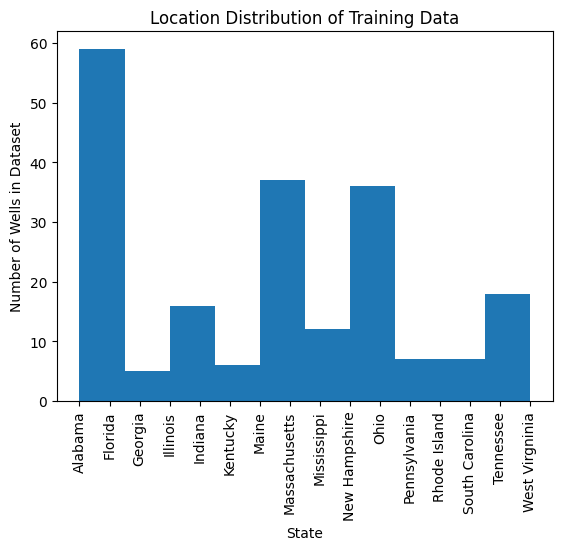

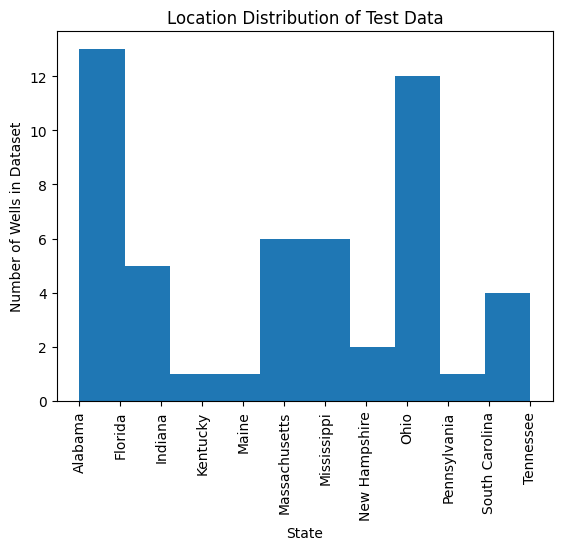

In [51]:
plt.hist(train_loc_data['STATE'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Wells in Dataset')
plt.title('Location Distribution of Training Data')
plt.show()

plt.hist(test_loc_data['STATE'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Wells in Dataset')
plt.title('Location Distribution of Test Data')
plt.show()

In [52]:
train_time_data = pd.read_csv(os.path.join(output_folder, "train_PFAS_ENV.csv"))
train_time_data = train_time_data.sort_values(by='DATE')
test_time_data = pd.read_csv(os.path.join(output_folder, "test_PFAS_ENV.csv"))
test_time_data = test_time_data.sort_values(by='DATE')
train_time_data.columns

Index(['NAWQA_ID', 'DATE', 'TIME', '4_2 FTS-RMK', '4_2 FTS-VA', '6_2 FTS-RMK',
       '6_2 FTS-VA', '8_2 FTS-RMK', '8_2 FTS-VA', 'N-EtFOSAA-RMK',
       'N-EtFOSAA-VA', 'N-MeFOSAA-RMK', 'N-MeFOSAA-VA', 'PFBS-RMK', 'PFBS-V',
       'PFBA-RMK', 'PFBA-VA', 'PFDS-RMK', 'PFDS-VA', 'PFDA-RMK', 'PFDA-VA',
       'PFDoA-RMK', 'PFDoA-VA', 'PFHpS-RMK', 'PFHpS-VA', 'PFHpA-RMK',
       'PFHpA-VA', 'PFHxS-RMK', 'PFHxS-VA', 'PFHxA-RMK', 'PFHxA-VA',
       'PFNS-RMK', 'PFNS-VA', 'PFNA-RMK', 'PFNA-VA', 'PFOSA-RMK', 'PFOSA-VA',
       'PFOS-RMK', 'PFOS-VA', 'PFOA-RMK', 'PFOA-VA', 'PFPeS-RMK', 'PFPeS-VA',
       'PFPeA-RMK', 'PFPeA-VA', 'PFTeDA-RMK', 'PFTeDA-VA', 'PFTrDA-RMK',
       'PFTrDA-VA', 'PFUnA-RMK', 'PFUnA-VA'],
      dtype='object')

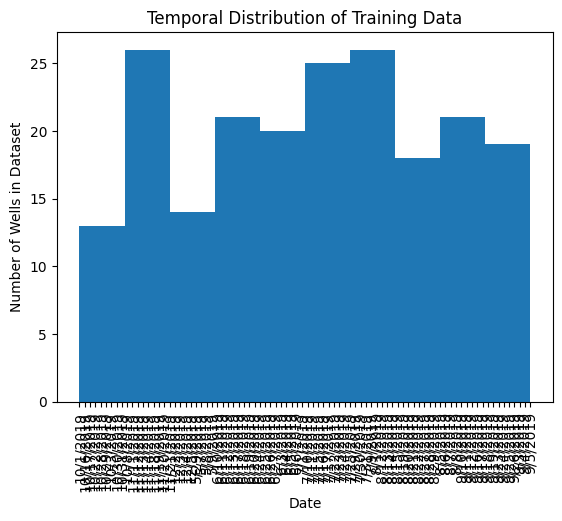

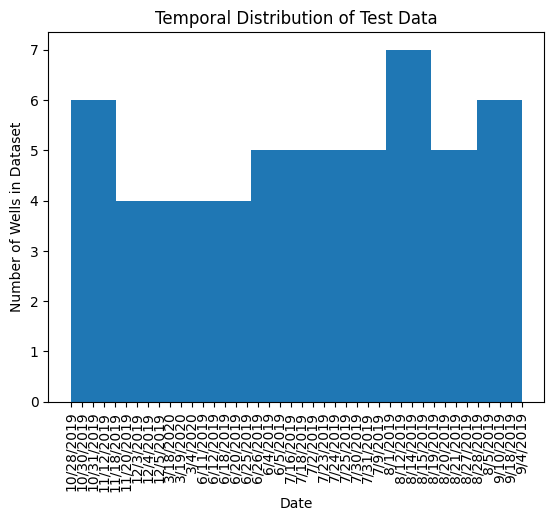

In [53]:
plt.hist(train_time_data['DATE'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Wells in Dataset')
plt.title('Temporal Distribution of Training Data')
plt.show()

plt.hist(test_time_data['DATE'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Wells in Dataset')
plt.title('Temporal Distribution of Test Data')
plt.show()

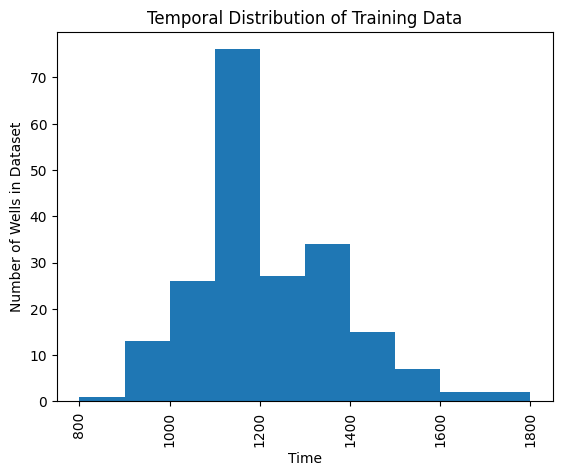

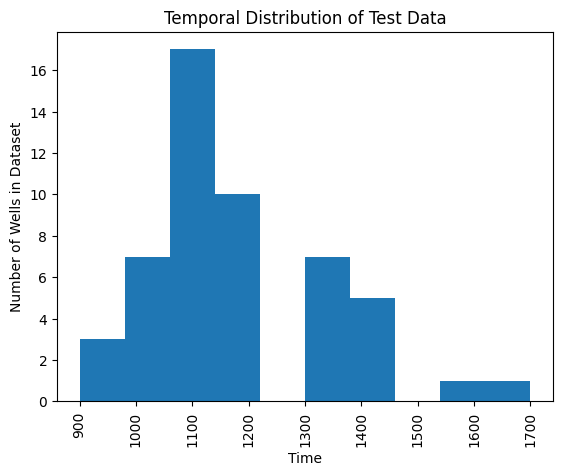

In [54]:
train_time_data = train_time_data.sort_values(by='TIME')
test_time_data = test_time_data.sort_values(by='TIME')

plt.hist(train_time_data['TIME'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Number of Wells in Dataset')
plt.title('Temporal Distribution of Training Data')
plt.show()

plt.hist(test_time_data['TIME'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Number of Wells in Dataset')
plt.title('Temporal Distribution of Test Data')
plt.show()